# Modern Data Analytics [G0Z39a]

## Project: Covid 19 in the USA

### Load packages

In [1]:
import os
import pandas as pd
import numpy as np


import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px

import plotly.offline as py
py.init_notebook_mode(connected=True)
pio.renderers.default = 'plotly_mimetype'
  
import matplotlib.pyplot as plt

### Load data

In [2]:
cwd = os.getcwd()

In [3]:
cwd

'C:\\Users\\35799\\Desktop\\KU Leuven\\Semester 2\\Modern Data Analytics\\project'

In [4]:
us = pd.read_csv(cwd+"/covid-19-data/us.csv")
counties_df = pd.read_csv(cwd+"/covid-19-data/us-counties.csv")
states_df = pd.read_csv(cwd+"/covid-19-data/us-states.csv")
counties20 = pd.read_csv(cwd+"/covid-19-data/us-counties-2020.csv")
counties21 = pd.read_csv(cwd+"/covid-19-data/us-counties-2021.csv")
counties22 = pd.read_csv(cwd+"/covid-19-data/us-counties-2022.csv")
facilities = pd.read_csv(cwd+"/covid-19-data/prisons/facilities.csv")
systems = pd.read_csv(cwd+"/covid-19-data/prisons/systems.csv")
colleges =  pd.read_csv(cwd+"/covid-19-data/colleges/colleges.csv")
c20_avg = pd.read_csv(cwd+"/covid-19-data/rolling-averages/us-counties-2020.csv")
c21_avg = pd.read_csv(cwd+"/covid-19-data/rolling-averages/us-counties-2021.csv")
c22_avg = pd.read_csv(cwd+"/covid-19-data/rolling-averages/us-counties-2022.csv")

### Data Info

#### Counties

In [5]:
counties20.head()

date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1     0.0
1  2020-01-22  Snohomish  Washington  53061.0      1     0.0
2  2020-01-23  Snohomish  Washington  53061.0      1     0.0
3  2020-01-24       Cook    Illinois  17031.0      1     0.0
4  2020-01-24  Snohomish  Washington  53061.0      1     0.0

In [6]:
counties20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884737 entries, 0 to 884736
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    884737 non-null  object 
 1   county  884737 non-null  object 
 2   state   884737 non-null  object 
 3   fips    876471 non-null  float64
 4   cases   884737 non-null  int64  
 5   deaths  865976 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 40.5+ MB


In [7]:
counties21.head()

date   county    state    fips  cases  deaths
0  2021-01-01  Autauga  Alabama  1001.0   4239    50.0
1  2021-01-01  Baldwin  Alabama  1003.0  13823   169.0
2  2021-01-01  Barbour  Alabama  1005.0   1517    33.0
3  2021-01-01     Bibb  Alabama  1007.0   1854    46.0
4  2021-01-01   Blount  Alabama  1009.0   4693    63.0

In [8]:
counties21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185373 entries, 0 to 1185372
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   date    1185373 non-null  object 
 1   county  1185373 non-null  object 
 2   state   1185373 non-null  object 
 3   fips    1174570 non-null  float64
 4   cases   1185373 non-null  int64  
 5   deaths  1156903 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 54.3+ MB


In [9]:
counties22.head()

date   county    state    fips  cases  deaths
0  2022-01-01  Autauga  Alabama  1001.0  11018   160.0
1  2022-01-01  Baldwin  Alabama  1003.0  39911   593.0
2  2022-01-01  Barbour  Alabama  1005.0   3860    81.0
3  2022-01-01     Bibb  Alabama  1007.0   4533    95.0
4  2022-01-01   Blount  Alabama  1009.0  11256   198.0

In [10]:
counties22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445749 entries, 0 to 445748
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    445749 non-null  object 
 1   county  445749 non-null  object 
 2   state   445749 non-null  object 
 3   fips    440986 non-null  float64
 4   cases   445749 non-null  int64  
 5   deaths  435063 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.4+ MB


In [11]:
c20_avg.head()

date      geoid     county       state  cases  cases_avg  \
0  2020-01-21  USA-53061  Snohomish  Washington      1       0.14   
1  2020-01-22  USA-53061  Snohomish  Washington      0       0.14   
2  2020-01-23  USA-53061  Snohomish  Washington      0       0.14   
3  2020-01-24  USA-53061  Snohomish  Washington      0       0.14   
4  2020-01-24  USA-17031       Cook    Illinois      1       0.14   

   cases_avg_per_100k  deaths  deaths_avg  deaths_avg_per_100k  
0                0.02       0         0.0                  0.0  
1                0.02       0         0.0                  0.0  
2                0.02       0         0.0                  0.0  
3                0.02       0         0.0                  0.0  
4                0.00       0         0.0                  0.0

In [12]:
c20_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889765 entries, 0 to 889764
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 889765 non-null  object 
 1   geoid                889765 non-null  object 
 2   county               889765 non-null  object 
 3   state                889765 non-null  object 
 4   cases                889765 non-null  int64  
 5   cases_avg            889765 non-null  float64
 6   cases_avg_per_100k   877322 non-null  float64
 7   deaths               889765 non-null  int64  
 8   deaths_avg           889765 non-null  float64
 9   deaths_avg_per_100k  877322 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 67.9+ MB


In [13]:
c21_avg.head()

date      geoid    county        state  cases  cases_avg  \
0  2021-01-01  USA-72999   Unknown  Puerto Rico    -17      35.29   
1  2021-01-01  USA-72153     Yauco  Puerto Rico      4       3.00   
2  2021-01-01  USA-72151   Yabucoa  Puerto Rico     10       7.29   
3  2021-01-01  USA-72149  Villalba  Puerto Rico      8       2.43   
4  2021-01-01  USA-72147   Vieques  Puerto Rico      0       1.00   

   cases_avg_per_100k  deaths  deaths_avg  deaths_avg_per_100k  
0                 NaN       0         0.0                  NaN  
1                8.86       0         0.0                  0.0  
2               22.66       0         0.0                  0.0  
3               11.31       0         0.0                  0.0  
4               11.96       0         0.0                  0.0

In [14]:
c22_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446847 entries, 0 to 446846
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 446847 non-null  object 
 1   geoid                446847 non-null  object 
 2   county               446847 non-null  object 
 3   state                446847 non-null  object 
 4   cases                446847 non-null  int64  
 5   cases_avg            446847 non-null  float64
 6   cases_avg_per_100k   441395 non-null  float64
 7   deaths               446847 non-null  int64  
 8   deaths_avg           446847 non-null  float64
 9   deaths_avg_per_100k  441395 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 34.1+ MB


In [15]:
c22_avg.head()

date      geoid    county        state  cases  cases_avg  \
0  2022-01-01  USA-72999   Unknown  Puerto Rico      0     328.14   
1  2022-01-01  USA-72153     Yauco  Puerto Rico      0      66.50   
2  2022-01-01  USA-72151   Yabucoa  Puerto Rico      0      63.13   
3  2022-01-01  USA-72149  Villalba  Puerto Rico      0      47.50   
4  2022-01-01  USA-72147   Vieques  Puerto Rico      0       7.63   

   cases_avg_per_100k  deaths  deaths_avg  deaths_avg_per_100k  
0                 NaN       0         0.0                  NaN  
1              196.40       0         0.0                  0.0  
2              196.30       0         0.0                  0.0  
3              221.18       0         0.0                  0.0  
4               91.16       0         0.0                  0.0

In [16]:
c22_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446847 entries, 0 to 446846
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 446847 non-null  object 
 1   geoid                446847 non-null  object 
 2   county               446847 non-null  object 
 3   state                446847 non-null  object 
 4   cases                446847 non-null  int64  
 5   cases_avg            446847 non-null  float64
 6   cases_avg_per_100k   441395 non-null  float64
 7   deaths               446847 non-null  int64  
 8   deaths_avg           446847 non-null  float64
 9   deaths_avg_per_100k  441395 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 34.1+ MB


#### Prisons

In [17]:
facilities.head()

nyt_id                                      facility_name  \
0  F3EFE858                      Alex City Work Release prison   
1  5B910220      Alabama Therapeutic Education Facility prison   
2  02FB1675                         Bibb Correctional Facility   
3  6378F6C4  Birmingham Women's Community Based Facility an...   
4  EAABF900                      Bullock Correctional Facility   

                 facility_type facility_city facility_county  \
0    Low-security work release     Alex City           Coosa   
1  State rehabilitation center    Columbiana          Shelby   
2                 State prison         Brent            Bibb   
3                 State prison    Birmingham       Jefferson   
4                 State prison      Bessemer         Bullock   

   facility_county_fips facility_state  facility_lng  facility_lat  \
0                  1037        Alabama    -86.009015     32.904507   
1                  1117        Alabama    -86.624067     33.180755   
2                  1007        Alabama    -87.162781     32.920754   
3                  1073        Alabama    -86.808344     33.531101   
4                  1011        Alabama    -85.673927     32.147144   

   latest_inmate_population  max_inmate_population_2020  total_inmate_cases  \
0                     188.0                         NaN                  77   
1                     272.0                         NaN                  11   
2                    1725.0                      1825.0                 164   
3                     192.0                         NaN                  17   
4                    1477.0                      1577.0                 162   

   total_inmate_deaths  total_officer_cases  total_officer_deaths note  
0                    0                   17                   0.0  NaN  
1                    1                    2                   0.0  NaN  
2                    3                   61                   0.0  NaN  
3                    0                   28                   0.0  NaN  
4                    5                   80                   1.0  NaN

In [18]:
facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nyt_id                      2639 non-null   object 
 1   facility_name               2639 non-null   object 
 2   facility_type               2639 non-null   object 
 3   facility_city               2629 non-null   object 
 4   facility_county             2639 non-null   object 
 5   facility_county_fips        2639 non-null   int64  
 6   facility_state              2638 non-null   object 
 7   facility_lng                2639 non-null   float64
 8   facility_lat                2639 non-null   float64
 9   latest_inmate_population    1593 non-null   float64
 10  max_inmate_population_2020  838 non-null    float64
 11  total_inmate_cases          2639 non-null   int64  
 12  total_inmate_deaths         2639 non-null   int64  
 13  total_officer_cases         2639 

#### Colleges

In [19]:
colleges.head()

date    state      county        city ipeds_id  \
0  2021-05-26  Alabama     Madison  Huntsville   100654   
1  2021-05-26  Alabama  Montgomery  Montgomery   100724   
2  2021-05-26  Alabama   Limestone      Athens   100812   
3  2021-05-26  Alabama         Lee      Auburn   100858   
4  2021-05-26  Alabama  Montgomery  Montgomery   100830   

                           college  cases  cases_2021 notes  
0           Alabama A&M University     41         NaN   NaN  
1         Alabama State University      2         NaN   NaN  
2          Athens State University     45        10.0   NaN  
3                Auburn University   2742       567.0   NaN  
4  Auburn University at Montgomery    220        80.0   NaN

In [20]:
colleges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1948 entries, 0 to 1947
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1948 non-null   object 
 1   state       1948 non-null   object 
 2   county      1946 non-null   object 
 3   city        1948 non-null   object 
 4   ipeds_id    1948 non-null   object 
 5   college     1948 non-null   object 
 6   cases       1948 non-null   int64  
 7   cases_2021  1611 non-null   float64
 8   notes       36 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 137.1+ KB


The following data sets are going to be used for downstream analysis:
- counties20
- counties21
- counties22
- facilities
- colleges

### Data Pre-Processing

#### Missing Values

##### Counties 2020

In [21]:
counties20[counties20['fips'].isna()]["county"].unique()

array(['New York City', 'Unknown', 'Kansas City', 'Joplin'], dtype=object)

In [22]:
counties20.loc[counties20.county == "New York City", "fips"] = float(36061)
counties20.loc[counties20.county == "Kansas City", "fips"] = float(20)
counties20.loc[counties20.county == "Joplin", "fips"] = float(2937592)

In [23]:
len(counties20[counties20['county']=="Unknown"])

7483

In [24]:
counties20.isnull().sum()

date          0
county        0
state         0
fips       7483
cases         0
deaths    18761
dtype: int64

##### Counties 2021

In [25]:
counties21[counties21['fips'].isna()]["county"].unique()

array(['Unknown', 'Joplin', 'Kansas City', 'New York City'], dtype=object)

In [26]:
counties21.loc[counties21.county == "New York City", "fips"] = float(36061)
counties21.loc[counties21.county == "Kansas City", "fips"] = float(20)
counties21.loc[counties21.county == "Joplin", "fips"] = float(2937592)

In [27]:
len(counties21[counties21['county']=="Unknown"])

9708

In [28]:
counties21.isnull().sum()

date          0
county        0
state         0
fips       9708
cases         0
deaths    28470
dtype: int64

##### Counties 2022

In [29]:
counties22[counties22['fips'].isna()]["county"].unique()

array(['Unknown', 'Joplin', 'Kansas City', 'New York City'], dtype=object)

In [30]:
counties22.loc[counties22.county == "New York City", "fips"] = float(36061)
counties22.loc[counties22.county == "Kansas City", "fips"] = float(20)
counties22.loc[counties22.county == "Joplin", "fips"] = float(2937592)

In [31]:
len(counties22[counties22['county']=="Unknown"])

4352

In [32]:
counties22.isnull().sum()

date          0
county        0
state         0
fips       4352
cases         0
deaths    10686
dtype: int64

##### Counties average 2020

In [33]:
c20_avg.isnull().sum()

date                       0
geoid                      0
county                     0
state                      0
cases                      0
cases_avg                  0
cases_avg_per_100k     12443
deaths                     0
deaths_avg                 0
deaths_avg_per_100k    12443
dtype: int64

##### Counties average 2021

In [34]:
c21_avg.isnull().sum()

date                       0
geoid                      0
county                     0
state                      0
cases                      0
cases_avg                  0
cases_avg_per_100k     15713
deaths                     0
deaths_avg                 0
deaths_avg_per_100k    15713
dtype: int64

##### Counties average 2022

In [35]:
c22_avg.isnull().sum()

date                      0
geoid                     0
county                    0
state                     0
cases                     0
cases_avg                 0
cases_avg_per_100k     5452
deaths                    0
deaths_avg                0
deaths_avg_per_100k    5452
dtype: int64

In [36]:
counties20_clean = counties20.dropna(axis=0)
counties21_clean = counties21.dropna(axis=0)
counties22_clean = counties22.dropna(axis=0)
c20_avg_clean = c20_avg.dropna(axis=0)
c21_avg_clean = c20_avg.dropna(axis=0)
c22_avg_clean = c20_avg.dropna(axis=0)

##### Prisons

In [37]:
facilities.isnull().sum()

nyt_id                           0
facility_name                    0
facility_type                    0
facility_city                   10
facility_county                  0
facility_county_fips             0
facility_state                   1
facility_lng                     0
facility_lat                     0
latest_inmate_population      1046
max_inmate_population_2020    1801
total_inmate_cases               0
total_inmate_deaths              0
total_officer_cases              0
total_officer_deaths             1
note                          2599
dtype: int64

In [38]:
facilities_clean = facilities.drop(columns=['note'])

In [39]:
facilities_clean.dropna(axis=0, inplace=True)

##### Colleges

In [40]:
colleges.isnull().sum()

date             0
state            0
county           2
city             0
ipeds_id         0
college          0
cases            0
cases_2021     337
notes         1912
dtype: int64

In [41]:
colleges_clean = colleges.drop(columns=['notes'])

In [42]:
colleges_clean.dropna(axis=0, inplace=True)

### Exploratory Data Analysis

#### US data

In [43]:
us.head()

date  cases  deaths
0  2020-01-21      1       0
1  2020-01-22      1       0
2  2020-01-23      1       0
3  2020-01-24      2       0
4  2020-01-25      3       0

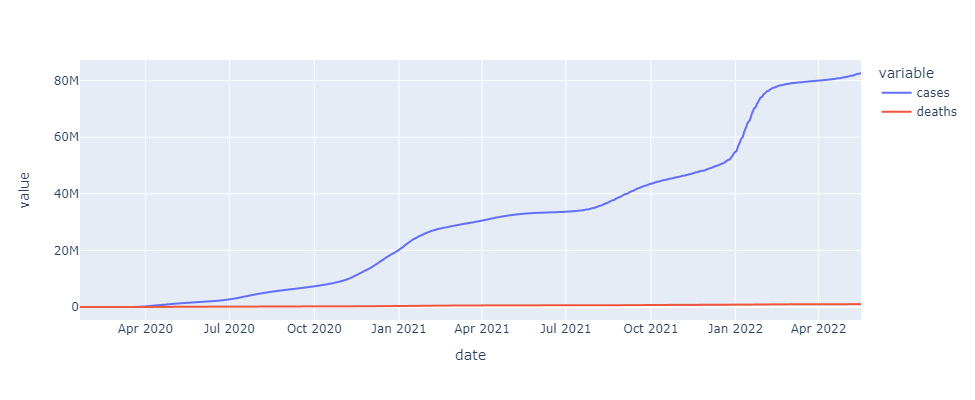

In [44]:
px.line(us, x="date", y=["cases", "deaths"], height=400)

#### Per State

In [45]:
c20_states = pd.DataFrame(counties20_clean.groupby(["state"])[["cases", "deaths"]].max())
c20_states = c20_states.astype({"deaths": int})
c20_states.head()

cases  deaths
state                     
Alabama      52339     697
Alaska       22820     118
Arizona     322449    5125
Arkansas     24662     390
California  770915   10345

In [46]:
c20_states = c20_states.reset_index(level=0)
c20_states.head()

state   cases  deaths
0     Alabama   52339     697
1      Alaska   22820     118
2     Arizona  322449    5125
3    Arkansas   24662     390
4  California  770915   10345

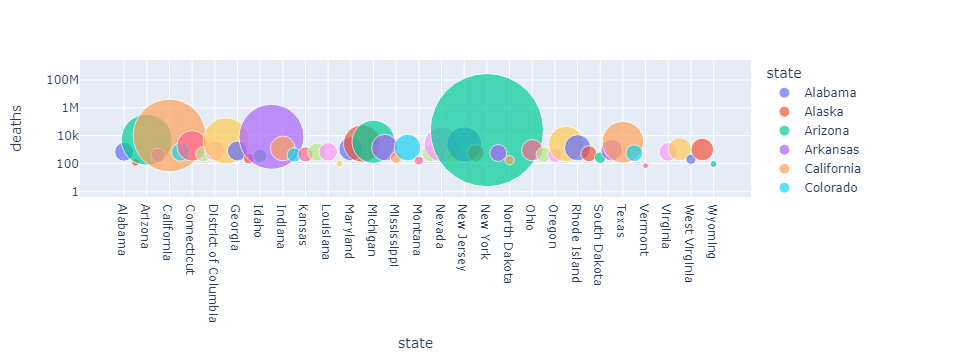

In [47]:
px.scatter(c20_states, x='state', y='deaths', 
           hover_data=['cases'],
           color='state', size='deaths', size_max=80, log_y=True)

In [48]:
c21_states = pd.DataFrame(counties21_clean.groupby(["state"])[["cases", "deaths"]].max())
c21_states = c21_states.astype({"deaths": int})
c21_states.head()

cases  deaths
state                      
Alabama      126583    2024
Alaska        63352     419
Arizona      870996   13675
Arkansas      65856     966
California  1697286   27637

In [49]:
c21_states = c21_states.reset_index(level=0)
c21_states.head()

state    cases  deaths
0     Alabama   126583    2024
1      Alaska    63352     419
2     Arizona   870996   13675
3    Arkansas    65856     966
4  California  1697286   27637

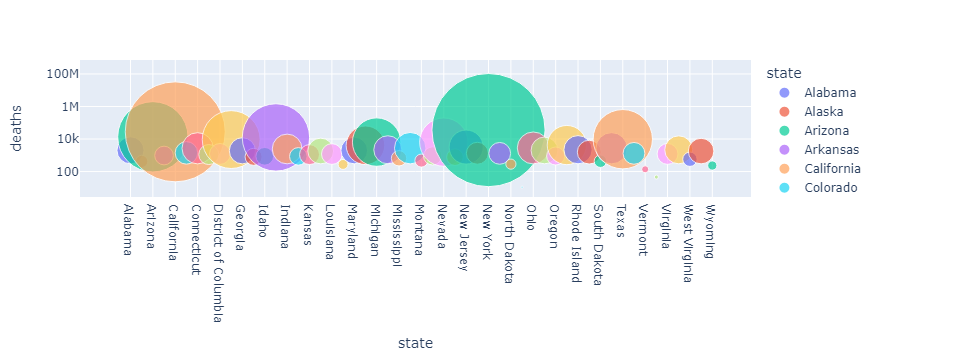

In [50]:
px.scatter(c21_states, x='state', y='deaths', 
           hover_data=['cases'],
           color='state', size='deaths', size_max=80, log_y=True)

In [51]:
c22_states = pd.DataFrame(counties22_clean.groupby(["state"])[["cases", "deaths"]].max())
c22_states = c22_states.astype({"deaths": int})
c22_states.head()

cases  deaths
state                      
Alabama      186245    2373
Alaska       105418     526
Arizona     1283590   17326
Arkansas     104125    1186
California  2918596   32045

In [52]:
c22_states = c22_states.reset_index(level=0)
c22_states.head()

state    cases  deaths
0     Alabama   186245    2373
1      Alaska   105418     526
2     Arizona  1283590   17326
3    Arkansas   104125    1186
4  California  2918596   32045

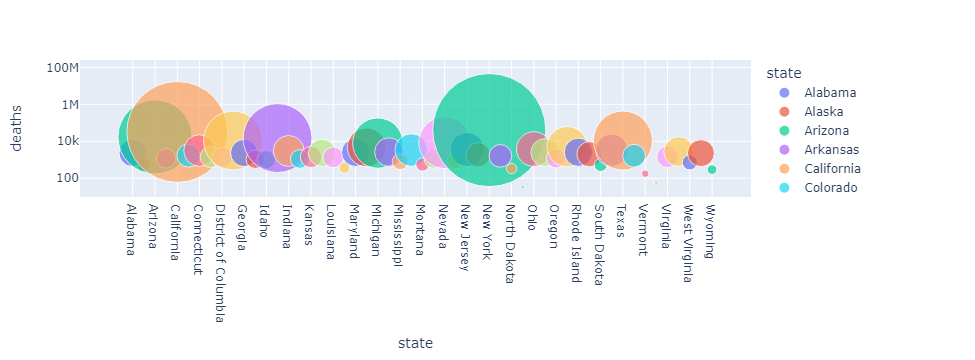

In [53]:
px.scatter(c22_states, x='state', y='deaths', 
           hover_data=['cases'],
           color='state', size='deaths', size_max=80, log_y=True)

#### Per County

In [54]:
c20_counties = pd.DataFrame(counties20_clean.groupby(["state", "county"])[["cases", "deaths"]].max())
c20_counties = c20_counties.astype({"deaths": int})
c20_counties.head()

cases  deaths
state   county                
Alabama Autauga   4190      48
        Baldwin  13601     161
        Barbour   1514      32
        Bibb      1834      46
        Blount    4641      63

In [55]:
c20_counties = c20_counties.reset_index(level=0)
c20_counties = c20_counties.reset_index(level=0)
c20_counties.head()

county    state  cases  deaths
0  Autauga  Alabama   4190      48
1  Baldwin  Alabama  13601     161
2  Barbour  Alabama   1514      32
3     Bibb  Alabama   1834      46
4   Blount  Alabama   4641      63

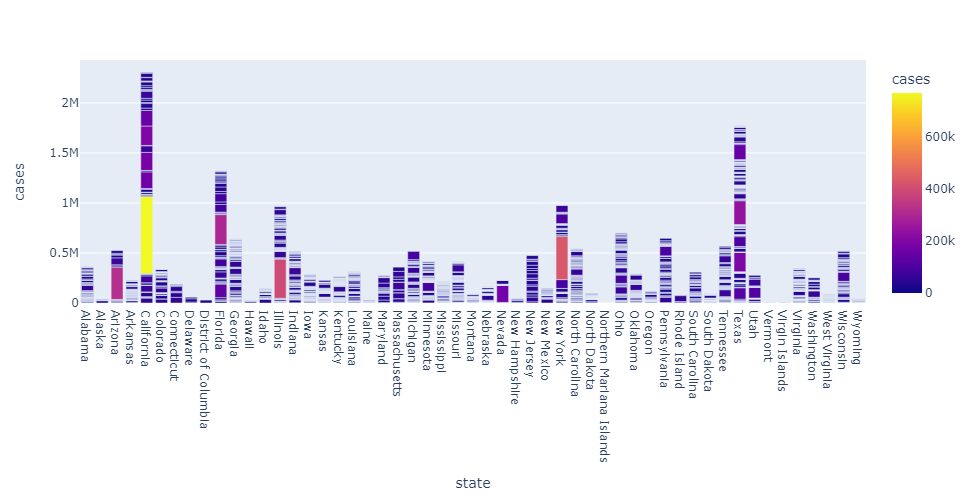

In [56]:
px.bar(c20_counties, x = 'state', 
       y = 'cases', color = 'cases', 
       height = 500, hover_data = ['county', 'deaths'])

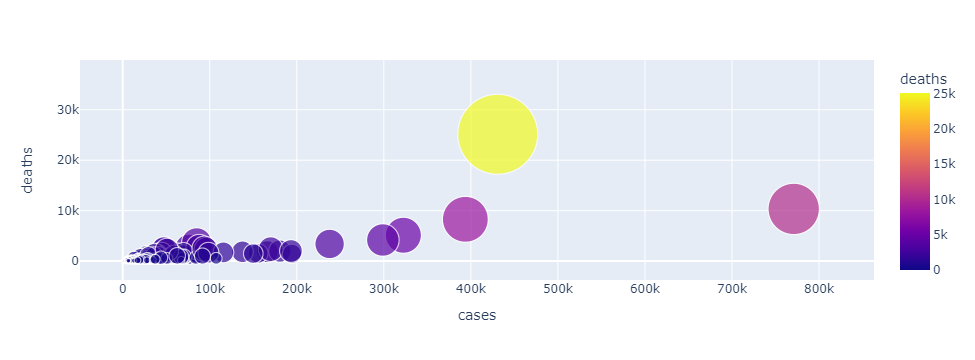

In [57]:
px.scatter(c20_counties, x='cases', y= 'deaths', 
           hover_data=['state', 'county'],
           color='deaths', size='deaths', size_max=80)

In [58]:
c21_counties = pd.DataFrame(counties21_clean.groupby(["state", "county"])[["cases", "deaths"]].max())
c21_counties = c21_counties.astype({"deaths": int})
c21_counties.head()

cases  deaths
state   county                
Alabama Autauga  11018     160
        Baldwin  39911     593
        Barbour   3860      81
        Bibb      4533      95
        Blount   11256     198

In [59]:
c21_counties = c21_counties.reset_index(level=0)
c21_counties = c21_counties.reset_index(level=0)
c21_counties.head()

county    state  cases  deaths
0  Autauga  Alabama  11018     160
1  Baldwin  Alabama  39911     593
2  Barbour  Alabama   3860      81
3     Bibb  Alabama   4533      95
4   Blount  Alabama  11256     198

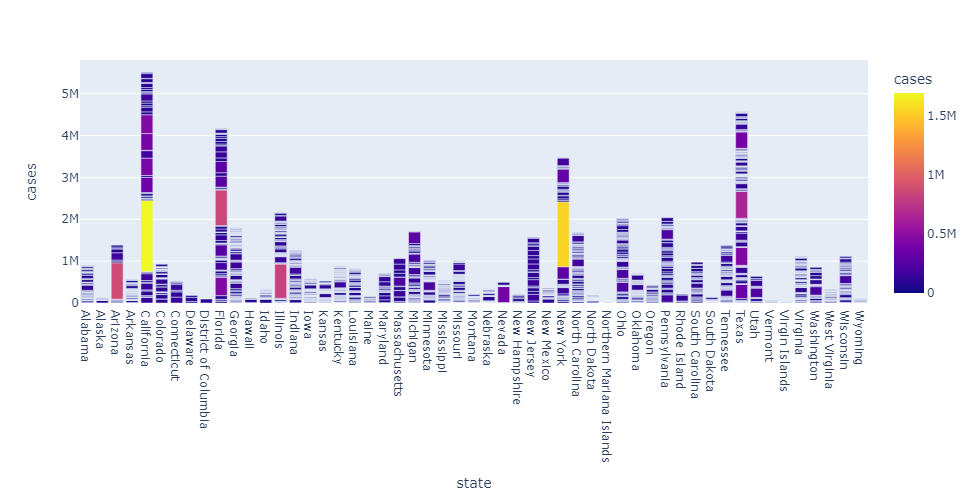

In [60]:
px.bar(c21_counties, x = 'state', 
       y = 'cases', color = 'cases', 
       height = 500, hover_data = ['county', 'deaths'])

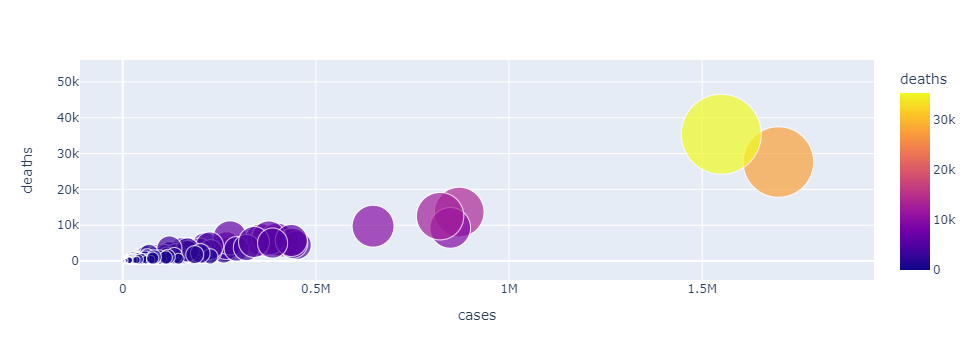

In [61]:
px.scatter(c21_counties, x='cases', y= 'deaths', 
           hover_data=['state', 'county'],
           color='deaths', size='deaths', size_max=80)

In [62]:
c22_counties = pd.DataFrame(counties22_clean.groupby(["state", "county"])[["cases", "deaths"]].max())
c22_counties = c22_counties.astype({"deaths": int})
c22_counties.head()

cases  deaths
state   county                
Alabama Autauga  15871     216
        Baldwin  55941     681
        Barbour   5688      98
        Bibb      6465     105
        Blount   15019     243

In [63]:
c22_counties = c22_counties.reset_index(level=0)
c22_counties = c22_counties.reset_index(level=0)
c22_counties.head()

county    state  cases  deaths
0  Autauga  Alabama  15871     216
1  Baldwin  Alabama  55941     681
2  Barbour  Alabama   5688      98
3     Bibb  Alabama   6465     105
4   Blount  Alabama  15019     243

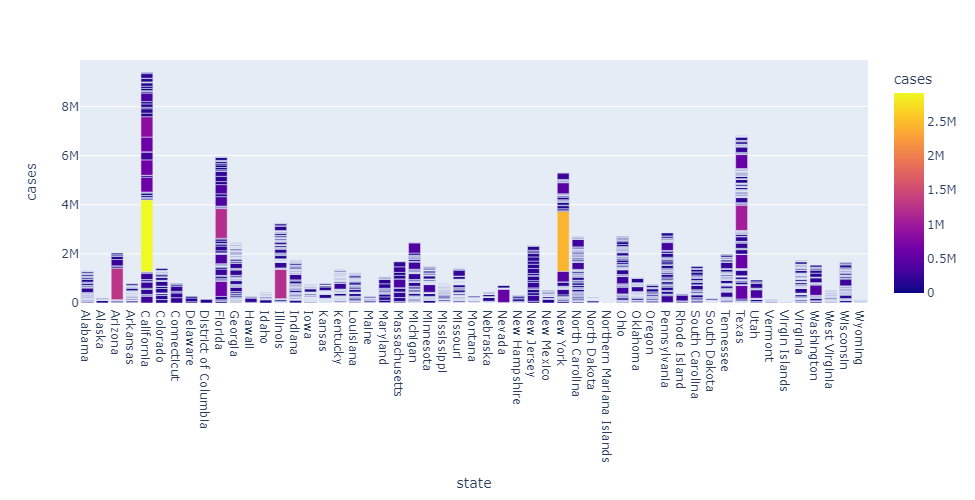

In [64]:
px.bar(c22_counties, x = 'state', 
       y = 'cases', color = 'cases', 
       height = 500, hover_data = ['county', 'deaths'])

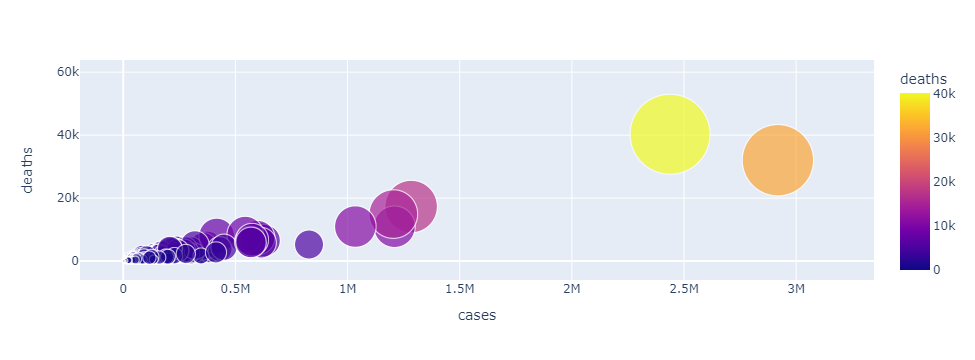

In [65]:
px.scatter(c22_counties, x='cases', y= 'deaths', 
           hover_data=['state', 'county'],
           color='deaths', size='deaths', size_max=80)

#### Map 1

In [66]:
# df_sample = pd.read_csv('https://raw.githubusercontent.com/Dreamsh0t/FIPS/master/diabetes_prevalence_change.csv') # Read in your data
# fips = df_sample['FIPS Code'].tolist() # Read in FIPS Codes

In [67]:
fips_dict = {}
counties = list(counties20_clean["county"])
fips = list(counties20_clean["fips"])
for (county, fip) in zip(counties, fips):
    fips_dict.update({county:int(fip)})

In [68]:
c20_counties['fips'] = c20_counties['county'].map(fips_dict)

In [69]:
c20_counties.head()

county    state  cases  deaths   fips
0  Autauga  Alabama   4190      48   1001
1  Baldwin  Alabama  13601     161  13009
2  Barbour  Alabama   1514      32  54001
3     Bibb  Alabama   1834      46  13021
4   Blount  Alabama   4641      63  47009

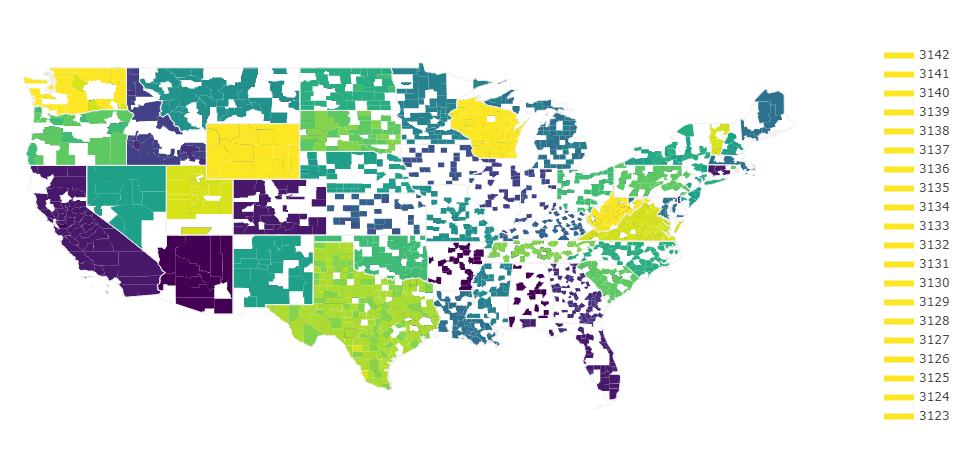

In [70]:
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

fips = c20_counties["fips"].to_list()
values = range(len(fips))

fig = ff.create_choropleth(fips=fips, values=values)
fig.layout.template = None
fig.show()

#### Map 2

In [71]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
codes = list(df["code"])
states = list(df["state"])
codes_dict = {}
for (state, code) in zip(states, codes):
    codes_dict.update({state:code})

In [72]:
c20_states['code'] = c20_states['state'].map(codes_dict)

In [73]:
c20_states.head()

state   cases  deaths code
0     Alabama   52339     697   AL
1      Alaska   22820     118   AK
2     Arizona  322449    5125   AZ
3    Arkansas   24662     390   AR
4  California  770915   10345   CA

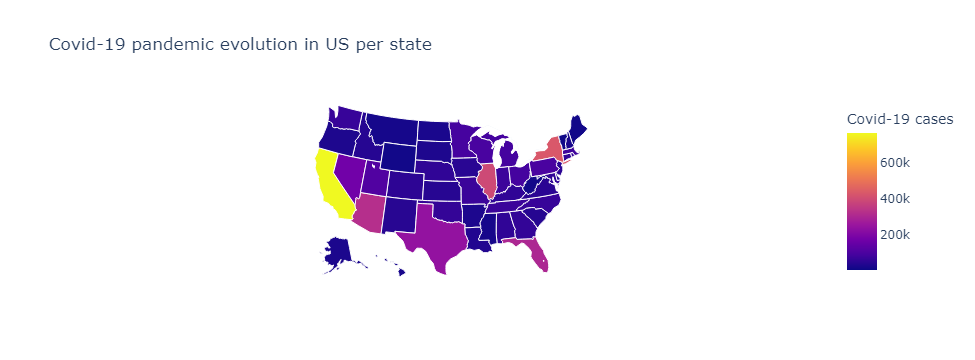

In [74]:
import plotly.graph_objects as go

import pandas as pd
df = c20_states

for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['state'] + '<br>' + \
'Cases ' + df['cases']  + '<br>' + \
' Deaths ' + df['deaths']

fig = go.Figure(data=go.Choropleth(
    locations=df['code'],
    z=df['cases'].astype(float),
    locationmode='USA-states',
    autocolorscale=True,
    text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Covid-19 cases"
))

fig.update_layout(
    title_text='Covid-19 pandemic evolution in US per state',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

#### Map 3

In [210]:
states_df = pd.read_csv(cwd+"/covid-19-data/us-states.csv")
coords = pd.read_csv(cwd+"/statelatlong.csv")

In [211]:
states_df.head()

date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0

In [212]:
coords.head()

State   Latitude   Longitude        City
0    AL  32.601011  -86.680736     Alabama
1    AK  61.302501 -158.775020      Alaska
2    AZ  34.168219 -111.930907     Arizona
3    AR  34.751928  -92.131378    Arkansas
4    CA  37.271875 -119.270415  California

In [213]:
lat = list(coords["Latitude"])
long = list(coords["Longitude"])
name = list(coords["City"])
lat_dict = {}
long_dict = {}
for (x,y,z) in zip(name, lat, long):
    lat_dict.update({x:y})
    long_dict.update({x:z})

In [214]:
states_df[["year", "month", "day"]] = states_df["date"].str.split("-", expand = True)
states_df.head()

date       state  fips  cases  deaths  year month day
0  2020-01-21  Washington    53      1       0  2020    01  21
1  2020-01-22  Washington    53      1       0  2020    01  22
2  2020-01-23  Washington    53      1       0  2020    01  23
3  2020-01-24    Illinois    17      1       0  2020    01  24
4  2020-01-24  Washington    53      1       0  2020    01  24

In [215]:
s = states_df.drop(["date", "day"], axis=1)
s.head()

state  fips  cases  deaths  year month
0  Washington    53      1       0  2020    01
1  Washington    53      1       0  2020    01
2  Washington    53      1       0  2020    01
3    Illinois    17      1       0  2020    01
4  Washington    53      1       0  2020    01

In [216]:
s = pd.DataFrame(s.groupby(["year", "month", "state"])[["cases", "deaths"]].max())
s.head()

cases  deaths
year month state                    
2020 01    Arizona         1       0
           California      3       0
           Illinois        2       0
           Washington      1       0
     02    Arizona         1       0

In [217]:
s = s.reset_index(level=0)
s = s.reset_index(level=0)
s = s.reset_index(level=0)
s.head()

state month  year  cases  deaths
0     Arizona    01  2020      1       0
1  California    01  2020      3       0
2    Illinois    01  2020      2       0
3  Washington    01  2020      1       0
4     Arizona    02  2020      1       0

In [218]:
s['code'] = s['state'].map(codes_dict)
# s['latitude'] = s['state'].map(lat_dict)
# s['longitude'] = s['state'].map(long_dict)
s.head()

state month  year  cases  deaths code
0     Arizona    01  2020      1       0   AZ
1  California    01  2020      3       0   CA
2    Illinois    01  2020      2       0   IL
3  Washington    01  2020      1       0   WA
4     Arizona    02  2020      1       0   AZ

In [219]:
s["date"] = s["year"]+"-"+s["month"]
map3 = s.drop(["year", "month"], axis=1)
col_order = ["date", "state", "code", "cases", "deaths"]
map3 = map3[col_order]
map3.sort_values(["date", "state"], inplace=True, ignore_index=True)
map3.head()

date       state code  cases  deaths
0  2020-01     Arizona   AZ      1       0
1  2020-01  California   CA      3       0
2  2020-01    Illinois   IL      2       0
3  2020-01  Washington   WA      1       0
4  2020-02     Arizona   AZ      1       0

In [220]:
for key, value in codes_dict.items():
    row = {'date': '2019-12', 'state': key, 'code': value, 'cases':0, 'deaths':0}
    map3 = map3.append(row, ignore_index = True)
map3.sort_values(["date", "state"], inplace=True, ignore_index=True)
map3.head()

date       state code  cases  deaths
0  2019-12     Alabama   AL      0       0
1  2019-12      Alaska   AK      0       0
2  2019-12     Arizona   AZ      0       0
3  2019-12    Arkansas   AR      0       0
4  2019-12  California   CA      0       0

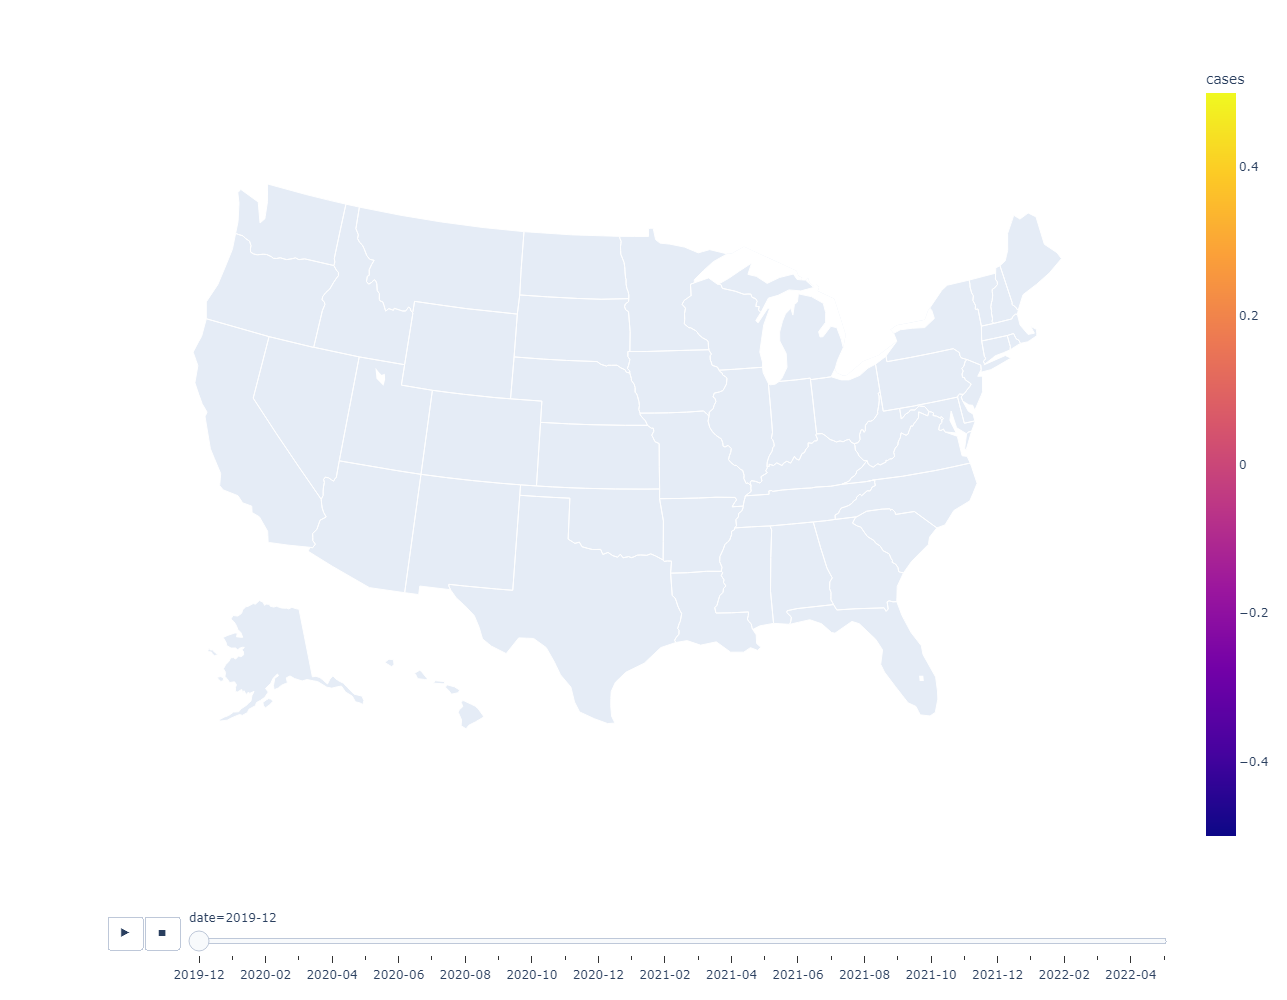

In [226]:
import plotly.express as px
fig = px.scatter_geo(map3, locations="code", color="cases", locationmode="USA-states", hover_name="state", hover_data=["cases", "deaths"], size="cases",
           animation_frame="date", projection="albers usa", width=1000, height=1000)
fig.show()